In [1]:
import numpy as np
from os import listdir
from os.path import isfile, join
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.lines import Line2D

In [2]:
seeds = np.arange(10)
METRICS_BASE = './metrics/'
lr = .001
epoch = 40*500
batch_size = 10
# l2_reg = .0001
num_monte_carlo_samples = 25
init_range = .0001

In [3]:
# baseline, random, project
ro = None
fair_reg = 0.
tf_prefixs = ['german_baseline', 'german_random', 'project']

n_units_grid = [0]
l2_reg_grid = [0.]

adv_epoch=100
adv_step=1.
l2_attack=0.01
adv_epoch_full=10
exp_types = ['stochastic', 'deterministic']
baseline_files = {}

for tf_prefix in tf_prefixs:
    baseline_files[tf_prefix] = {}
    for exp_type in exp_types:
        baseline_files[tf_prefix][exp_type] = {}
        for _n_units in n_units_grid:
            if _n_units == 100 and tf_prefix == 'german_random':
                continue
            baseline_files[tf_prefix][exp_type][_n_units] = {}
            for l2_reg in l2_reg_grid:
                baseline_files[tf_prefix][exp_type][_n_units][l2_reg] = []
                for post_idx in seeds:
                    if tf_prefix == 'german_random':
                        epoch = 0
                    else:
                        epoch = 40*500
                    if _n_units == 0:
                        n_units = []
                    else:
                        n_units = [_n_units]
                    tb_long = '_'.join(['adv-epoch:' + str(adv_epoch),
                                    'batch_size:' + str(batch_size), 'adv-step:' + str(adv_step),
                                    'l2_attack:' + str(l2_attack), 'adv_epoch_full:' + str(adv_epoch_full),
                                    'ro:' + str(ro), 'lr:' + str(lr), 'MC:' + str(num_monte_carlo_samples),
                                    'reg:' + str(fair_reg), 'epoch:' + str(epoch), 'l2reg:' + str(l2_reg), 'init_range:' + str(init_range)]) + '_' + 'arch:' + ','.join(list(map(str,n_units)))
                    file_name = METRICS_BASE + tf_prefix + '_' + tb_long + '_' + 'test_' + exp_type +'_metrics' + '_' + str(post_idx) + '.npy'
                    baseline_files[tf_prefix][exp_type][_n_units][l2_reg].append(np.load(file_name, allow_pickle = True))



In [5]:
# sensei
ro_grid = [1.]
fair_reg_grid = [.001, .01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, .1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 50., 100.]
n_units_grid = [0.]
l2_reg_grid = [0.]
tf_prefix = 'german_sensei'
adv_epoch=20
adv_step=.01
l2_attack=.001
adv_epoch_full=20
exp_types = ['stochastic', 'deterministic']
sensei_files = {}

for exp_type in exp_types:
    sensei_files[exp_type] = {}
    for post_idx in seeds:
        sensei_files[exp_type][post_idx] = {}
        for _n_units in n_units_grid:
            sensei_files[exp_type][post_idx][_n_units] = {}
            for l2_reg in l2_reg_grid:
                sensei_files[exp_type][post_idx][_n_units][l2_reg] = {}
                for ro in ro_grid:
                    sensei_files[exp_type][post_idx][_n_units][l2_reg][ro] = []
                    for fair_reg in fair_reg_grid:
                        if _n_units == 0:
                            n_units = []
                        else:
                            n_units = [_n_units]
                        tb_long = '_'.join(['adv-epoch:' + str(adv_epoch),
                                        'batch_size:' + str(batch_size), 'adv-step:' + str(adv_step),
                                        'l2_attack:' + str(l2_attack), 'adv_epoch_full:' + str(adv_epoch_full),
                                        'ro:' + str(ro), 'lr:' + str(lr), 'MC:' + str(num_monte_carlo_samples),
                                        'reg:' + str(fair_reg), 'epoch:' + str(epoch), 'l2reg:' + str(l2_reg), 'init_range:' + str(init_range)]) + '_' + 'arch:' + ','.join(list(map(str,n_units)))
                        file_name = METRICS_BASE + tf_prefix + '_' + tb_long + '_' + 'test_' + exp_type +'_metrics' + '_' + str(post_idx) + '.npy'
                        sensei_files[exp_type][post_idx][_n_units][l2_reg][ro].append(np.load(file_name, allow_pickle = True))
                            

In [6]:
METRICS_BASE = 'metrics/'
# PG
ro = None
fair_reg = 0.
batch_size = 1
adv_epoch=100
adv_step=1.
l2_attack=0.01
adv_epoch_full=10
_epoch = 0
lr = .04
l2_reg = 0.
n_units = []
exp_types = ['stochastic', 'deterministic']
num_monte_carlo_samples = 25
PG_files = {}

lamb_grid = [0.0, .1, 1.0, 2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 100.0]
lamb_grid = [0.0, .1, 1., 1.5, 2., 2.5, 3., 3.5, 4.]
epoch_grid = [100, 150]

for exp_type in exp_types:
    PG_files[exp_type] = {}
    for post_idx in seeds:
        PG_files[exp_type][post_idx] = {}
        for epoch in epoch_grid:
            PG_files[exp_type][post_idx][epoch] = []
            for lam in lamb_grid:
                tf_prefix='PG_'+str(lam) +'_'+ str(epoch)
                
                tb_long = '_'.join(['adv-epoch:' + str(adv_epoch),
                                'batch_size:' + str(batch_size), 'adv-step:' + str(adv_step),
                                'l2_attack:' + str(l2_attack), 'adv_epoch_full:' + str(adv_epoch_full),
                                'ro:' + str(ro), 'lr:' + str(lr), 'MC:' + str(num_monte_carlo_samples),
                                'reg:' + str(fair_reg), 'epoch:' + str(_epoch), 'l2reg:' + str(l2_reg), 'init_range:' + str(init_range)]) + '_' + 'arch:' + ','.join(list(map(str,n_units)))
                file_name = METRICS_BASE + tf_prefix + '_' + tb_long + '_' + 'test_' + exp_type +'_metrics' + '_' + str(post_idx) + '.npy'
                PG_files[exp_type][post_idx][epoch].append(np.load(file_name, allow_pickle = True))


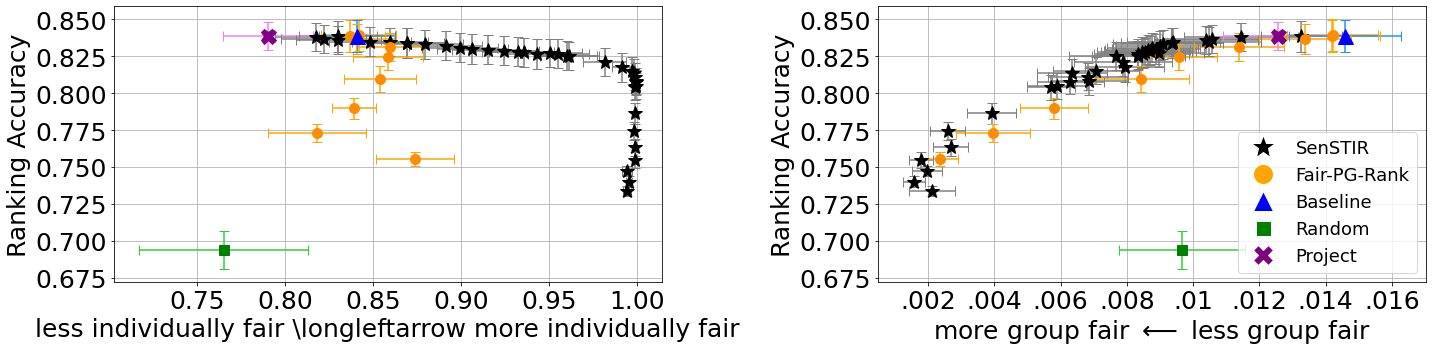

In [15]:
fair_reg_grid = [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.28, 0.37, 0.46, 0.55, 0.64, 0.73, 0.82, 0.91, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


f = plt.figure(figsize=(20,5))
n_units = 0
l2_reg = .0
m = -4
exp_type = 'deterministic'
# for ro in ro_grid:
colors = ['black', 'grey', 'blue']
# for ct, ro in enumerate([1., .1, .01]):
# f.suptitle('German Credit', fontsize = 20)
plt.subplot(1,2,1)
for ct, ro in enumerate([1.]):
#     plt.title('weighted KL correlation \n (deterministic)', fontsize=20)
    # sensei
    for idx,fair_reg in enumerate(fair_reg_grid):
        exp_type = 'stochastic'
        ndcg = [sensei_files[exp_type][s][n_units][l2_reg][ro][idx][3] for s in seeds]
        y = np.mean(ndcg)

        exp_type = 'deterministic'
        KL = [sensei_files[exp_type][s][n_units][l2_reg][ro][idx][-1][m] for s in seeds]
        x = np.mean(KL)
        
        plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 15, ecolor = 'grey', fmt = '*', xerr = stats.sem(KL), capsize = 5, color = 'black')
        
colors = ['orange', 'red']
# for ct, epoch in enumerate([40,80]):
for ct, epoch in enumerate([100]):
    # PG
    for idx,lam in enumerate(lamb_grid):
        exp_type = 'stochastic'
        ndcg = [PG_files[exp_type][s][epoch][idx][3] for s in seeds]
        y = np.mean(ndcg)
        exp_type = 'deterministic'
        KL = [PG_files[exp_type][s][epoch][idx][-1][m] for s in seeds]
        x = np.mean(KL)
        plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 10, ecolor = 'orange',fmt = 'o', xerr = stats.sem(KL), capsize = 5, color = 'darkorange')

#random
ndcg = [baseline_files['german_random']['stochastic'][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['german_random']['deterministic'][n_units][l2_reg][s][-1][m] for s in seeds]
x = np.mean(KL)
plt.scatter(x,y, color = 'green')
# plt.errorbar(x, y, yerr=stats.sem(ndcg), xerr = stats.sem(KL), capsize = 5, color = 'limegreen')
plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 10, ecolor = 'limegreen',fmt = 's', xerr = stats.sem(KL), capsize = 5, color = 'green')

#project
ndcg = [baseline_files['project']['stochastic'][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['project']['deterministic'][n_units][l2_reg][s][-1][m] for s in seeds]
x = np.mean(KL)

plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 15, ecolor = 'violet',fmt = 'X', xerr = stats.sem(KL), capsize = 5, color = 'purple')

#baseline
ndcg = [baseline_files['german_baseline']['stochastic'][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['german_baseline']['deterministic'][n_units][l2_reg][s][-1][m] for s in seeds]
x = np.mean(KL)

plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 15, ecolor = 'dodgerblue',fmt = '^', xerr = stats.sem(KL), capsize = 5, color = 'blue')

plt.xticks(fontsize = 25, rotation = 0)
plt.yticks(fontsize = 25)
plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')

plt.xlabel('Kendall\'s Tau Correlation with Counterfactuals', fontsize = 25)
plt.ylabel('NDCG', fontsize = 25)

orange_patch = Line2D([], [], linestyle = None, marker='o', color='white', label='Fair-PG-Rank',
                          markerfacecolor='orange', markersize=20)
# black_patch = mpatches.Patch(color='black', label='SenSTIR')
black_patch = Line2D([], [], marker='*', color='white', label='SenSTIR',
                          markerfacecolor='black', markersize=25)
blue_patch = Line2D([], [], marker='^', color='white', label='Baseline',
                          markerfacecolor='blue', markersize=20)
green_patch = Line2D([], [], marker='s', markerfacecolor = 'green', color='white', label='Random',
                           markersize=15)
purple_patch = Line2D([], [], marker='X', color = 'white', markerfacecolor='purple', label='Project',
                           markersize=20)
################################
m = 4

plt.subplot(1,2,2)
colors = ['black', 'grey', 'blue']
exp_type = 'stochastic'
for ct, ro in enumerate([1.]):
#     plt.title('Stochastic Group Exposure', fontsize=20)
    # sensei
    for idx,fair_reg in enumerate(fair_reg_grid):
        ndcg = [sensei_files[exp_type][s][n_units][l2_reg][ro][idx][3] for s in seeds]
        y = np.mean(ndcg)

        KL = [sensei_files[exp_type][s][n_units][l2_reg][ro][idx][m] for s in seeds]
        x = np.mean(KL)
        markers, caps, bars =  plt.errorbar(x,y,yerr = stats.sem(ndcg), ecolor = 'grey', markersize = 15, fmt = '*', xerr = stats.sem(KL), capsize = 5, color = 'black')
        
colors = ['orange', 'red']
# for ct, epoch in enumerate([40,80]):
for ct, epoch in enumerate([100]):
    # PG
    for idx,lam in enumerate(lamb_grid):
        ndcg = [PG_files[exp_type][s][epoch][idx][3] for s in seeds]
        y = np.mean(ndcg)
        
        KL = [PG_files[exp_type][s][epoch][idx][m] for s in seeds]
        x = np.mean(KL)
        plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 10, ecolor = 'orange',fmt = 'o', xerr = stats.sem(KL), capsize = 5, color = 'darkorange')
#random
ndcg = [baseline_files['german_random'][exp_type][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['german_random'][exp_type][n_units][l2_reg][s][m] for s in seeds]
x = np.mean(KL)
plt.scatter(x,y, color = 'green')
plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 10, ecolor = 'limegreen',fmt = 's', xerr = stats.sem(KL), capsize = 5, color = 'green', label = 'Random')


#project
ndcg = [baseline_files['project'][exp_type][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['project'][exp_type][n_units][l2_reg][s][m] for s in seeds]
x = np.mean(KL)
plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 15, ecolor = 'violet',fmt = 'X', xerr = stats.sem(KL), capsize = 5, color = 'purple', label = 'Project')

#baseline
ndcg = [baseline_files['german_baseline'][exp_type][n_units][l2_reg][s][3] for s in seeds]
y = np.mean(ndcg)

KL = [baseline_files['german_baseline'][exp_type][n_units][l2_reg][s][m] for s in seeds]
x = np.mean(KL)

plt.errorbar(x,y,yerr = stats.sem(ndcg), markersize = 15, ecolor = 'dodgerblue',fmt = '^', xerr = stats.sem(KL), capsize = 5, color = 'blue', label = 'Baseline')

plt.xlabel('Group Exposure for Age', fontsize = 25)
plt.ylabel('NDCG', fontsize = 25)
plt.xticks(ticks = [.002, .004, .006, .008, .01, .012, .014, .016], labels = ['.002', '.004', '.006', '.008', '.01', '.012', '.014', '.016'], fontsize = 25, rotation = 0)
plt.yticks(fontsize = 25)

plt.grid(b=True, which='major')
plt.grid(b=True, which='minor')
# plt.legend(fontsize = 16, loc = 4)
plt.legend(handles=[black_patch, orange_patch,blue_patch, green_patch, purple_patch ], fontsize = 18, loc =4)

plt.tight_layout()
plt.savefig('KL_group_exposure_scatter_german.pdf')
plt.show()

